#SPRINT 2 -FOOTBALL DATA ANALYSIS


Download the results.csv file from https://www.kaggle.com/irkaal/english-premier-league-results/download and upload it in files section

In [ ]:
file_loc = './results.csv'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
EPL_data = pd.read_csv(file_loc, encoding = 'unicode_escape')

In [ ]:
df = EPL_data

# **Data cleaning**

In [ ]:
EPL_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,1993-94,1993-08-14T00:00:00Z,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-94,1993-08-14T00:00:00Z,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-94,1993-08-14T00:00:00Z,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-94,1993-08-14T00:00:00Z,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-94,1993-08-14T00:00:00Z,Man City,Leeds,1,1,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


In [ ]:
pd.isna(EPL_data).sum()

Season         0
DateTime       0
HomeTeam       0
AwayTeam       0
FTHG           0
FTAG           0
FTR            0
HTHG         924
HTAG         924
HTR          924
Referee     2824
HS          2824
AS          2824
HST         2824
AST         2824
HC          2824
AC          2824
HF          2824
AF          2824
HY          2824
AY          2824
HR          2824
AR          2824
dtype: int64

In [ ]:
EPL_data = EPL_data.drop(range(0,(2824)), axis =0)
pd.isna(EPL_data).sum()

Season      0
DateTime    0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HC          0
AC          0
HF          0
AF          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [ ]:
EPL_data

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
2824,2000-01,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
2825,2000-01,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2826,2000-01,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
2827,2000-01,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
2828,2000-01,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,2021-05-23T16:00:00Z,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0
10800,2020-21,2021-05-23T16:00:00Z,Man City,Everton,5,0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0
10801,2020-21,2021-05-23T16:00:00Z,Sheffield United,Burnley,1,0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0
10802,2020-21,2021-05-23T16:00:00Z,West Ham,Southampton,3,0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0


# **Data processing**

In [ ]:
EPL_data['Month'] = pd.DatetimeIndex(EPL_data['DateTime']).month
EPL_data['Day'] = pd.DatetimeIndex(EPL_data['DateTime']).day
EPL_data = EPL_data.drop('DateTime', axis = 1)
EPL_data.head()

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
2824,2000-01,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,8,19
2825,2000-01,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,8,19
2826,2000-01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,8,19
2827,2000-01,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,8,19
2828,2000-01,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,8,19


In [ ]:
EPL_data.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
count,7980.000000,7980.000000,7980.000000,7980.00000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000,7980.000000
mean,1.520551,1.149749,0.681704,0.50401,13.492481,10.604762,6.173935,4.792732,6.102005,4.780201,11.426065,11.934586,1.404762,1.745489,0.063409,0.090476,6.740100,16.019799
std,1.297738,1.138600,0.831569,0.71970,5.245264,4.549672,3.338950,2.795785,3.099814,2.727745,3.787126,3.954527,1.184170,1.268853,0.254774,0.299282,3.934368,9.076487
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.00000,10.000000,7.000000,4.000000,3.000000,4.000000,3.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,3.000000,8.000000
50%,1.000000,1.000000,0.000000,0.00000,13.000000,10.000000,6.000000,4.000000,6.000000,4.000000,11.000000,12.000000,1.000000,2.000000,0.000000,0.000000,8.000000,16.000000
75%,2.000000,2.000000,1.000000,1.00000,17.000000,13.000000,8.000000,6.000000,8.000000,6.000000,14.000000,14.000000,2.000000,3.000000,0.000000,0.000000,11.000000,24.000000
max,9.000000,9.000000,5.000000,5.00000,43.000000,30.000000,24.000000,20.000000,20.000000,19.000000,33.000000,29.000000,7.000000,9.000000,3.000000,2.000000,12.000000,31.000000


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
EPL_by_season =  EPL_data.groupby(['Season']).sum()
EPL_by_season

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day
Season,,,,,,,,,,,,,,,,,,
2000-01,587,405,261.0,181.0,4861.0,3564.0,2342.0,1722.0,2390.0,1766.0,4932.0,5299.0,512.0,682.0,32.0,31.0,2615,6187
2001-02,557,444,257.0,195.0,4656.0,3505.0,2202.0,1655.0,2441.0,1757.0,4891.0,5221.0,479.0,686.0,32.0,40.0,2550,6214
2002-03,570,430,253.0,182.0,4876.0,3644.0,2605.0,1906.0,2516.0,1887.0,4791.0,4875.0,500.0,642.0,27.0,48.0,2627,6107
2003-04,572,440,262.0,198.0,4960.0,3848.0,2727.0,2048.0,2385.0,1853.0,4742.0,5051.0,481.0,600.0,20.0,38.0,2481,6335
2004-05,570,405,253.0,174.0,4819.0,3622.0,2591.0,1879.0,2309.0,1786.0,4730.0,5186.0,421.0,610.0,27.0,32.0,2566,5937
2005-06,555,389,272.0,170.0,4689.0,3504.0,2485.0,1769.0,2270.0,1781.0,4938.0,5060.0,499.0,674.0,27.0,49.0,2524,6018
2006-07,552,379,258.0,162.0,4906.0,3647.0,2526.0,1825.0,2420.0,1866.0,4686.0,4834.0,530.0,695.0,17.0,36.0,2664,6260
2007-08,581,421,244.0,171.0,4882.0,3901.0,2635.0,2111.0,2374.0,1828.0,4570.0,4696.0,511.0,705.0,31.0,30.0,2544,5832
2008-09,532,410,233.0,165.0,5187.0,4069.0,2842.0,2157.0,2374.0,1845.0,4300.0,4525.0,515.0,683.0,26.0,37.0,2607,6497


# Visualize the data

Text(0, 0.5, 'Goals')

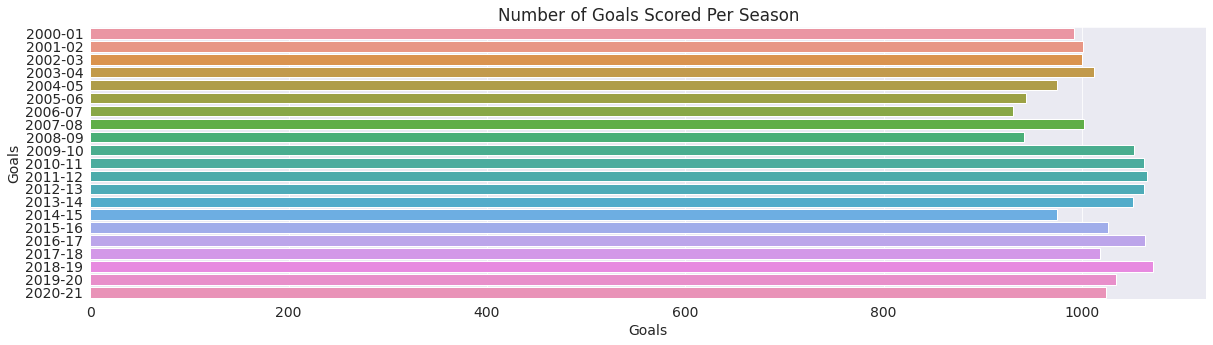

In [ ]:
EPL_by_season['Goals'] = EPL_by_season['FTHG'] + EPL_by_season['FTAG']
EPL_by_season = EPL_by_season.reset_index()
sns.barplot('Goals','Season',   data = EPL_by_season)
plt.title('Number of Goals Scored Per Season') 
plt.ylabel('Goals')

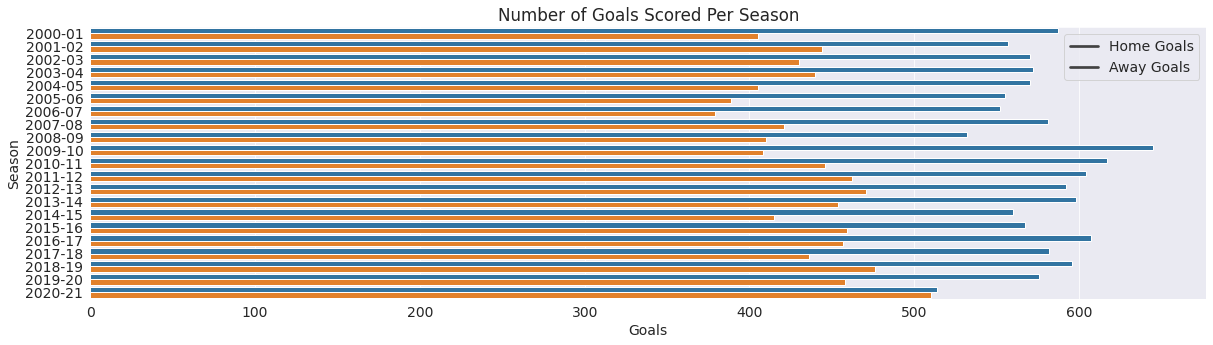

In [ ]:
EPL_melted = EPL_by_season[['Season', 'FTHG', 'FTAG']]
EPL_melt = EPL_melted.melt("Season",var_name="H/A",value_name="Goals")
EPL_melt
sns.barplot('Goals', 'Season', hue = 'H/A',data = EPL_melt)
plt.title('Number of Goals Scored Per Season') 
plt.ylabel('Season')
plt.legend(['Home Goals', 'Away Goals'])

In [ ]:
EPL_heat = EPL_data.groupby(['Season','Month']).sum().reset_index()
EPL_heat['Goals'] = EPL_heat['FTHG'] + EPL_heat['FTAG']
Final = EPL_heat.pivot('Season','Month', 'Goals' )
Final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
2000-01,92.0,62.0,70.0,133.0,84.0,NaN,NaN,87.0,130.0,84.0,102.0,148.0
2001-02,109.0,69.0,150.0,113.0,40.0,NaN,NaN,63.0,122.0,95.0,69.0,171.0
2002-03,108.0,89.0,75.0,146.0,64.0,NaN,NaN,85.0,110.0,76.0,114.0,133.0
2003-04,102.0,125.0,85.0,129.0,87.0,NaN,NaN,103.0,87.0,71.0,92.0,131.0
2004-05,101.0,98.0,45.0,131.0,81.0,NaN,NaN,114.0,57.0,101.0,118.0,129.0
2005-06,79.0,100.0,122.0,128.0,43.0,NaN,NaN,75.0,56.0,109.0,75.0,157.0
2006-07,116.0,73.0,65.0,138.0,52.0,NaN,NaN,71.0,69.0,79.0,90.0,178.0
2007-08,82.0,70.0,134.0,111.0,56.0,NaN,NaN,89.0,99.0,97.0,84.0,180.0
2008-09,84.0,53.0,84.0,113.0,96.0,NaN,NaN,79.0,85.0,103.0,120.0,125.0


Text(0.5, 1.0, 'Goals Distribution based on month')

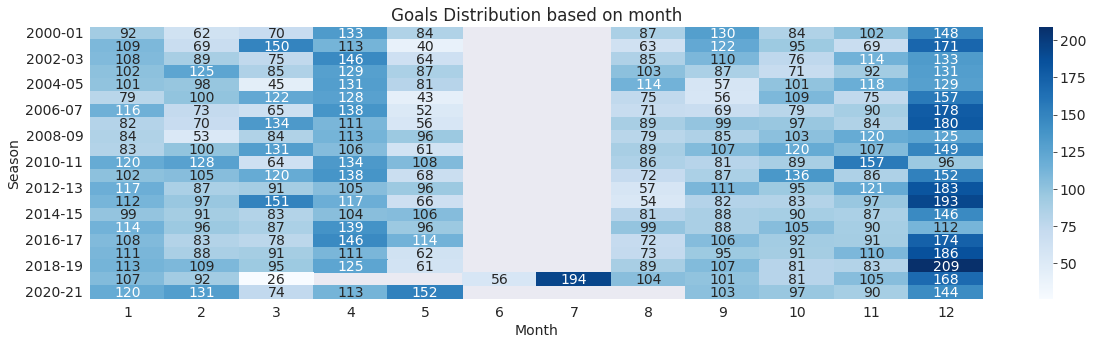

In [ ]:
sns.heatmap(Final, annot = True, cmap = 'Blues',fmt='g')
plt.title('Goals Distribution based on month')

In [ ]:
EPL_count = EPL_data.groupby(['Season','Month']).count().reset_index()
EPL_heat['G/M'] = round(EPL_heat['Goals'] / EPL_count['FTHG'])
Final = EPL_heat.pivot('Season', 'Month', 'G/M')
Final

Month,1,2,3,4,5,6,7,8,9,10,11,12
Season,,,,,,,,,,,,
2000-01,2.0,2.0,2.0,3.0,3.0,NaN,NaN,3.0,3.0,3.0,3.0,3.0
2001-02,3.0,2.0,3.0,2.0,3.0,NaN,NaN,2.0,3.0,3.0,2.0,3.0
2002-03,3.0,3.0,2.0,3.0,3.0,NaN,NaN,2.0,2.0,2.0,2.0,2.0
2003-04,3.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,3.0,2.0,2.0,3.0
2004-05,3.0,3.0,2.0,2.0,3.0,NaN,NaN,3.0,2.0,3.0,3.0,3.0
2005-06,2.0,3.0,3.0,2.0,3.0,NaN,NaN,2.0,2.0,3.0,2.0,3.0
2006-07,3.0,2.0,2.0,3.0,2.0,NaN,NaN,3.0,2.0,2.0,2.0,3.0
2007-08,2.0,2.0,3.0,3.0,3.0,NaN,NaN,2.0,3.0,3.0,3.0,3.0
2008-09,2.0,2.0,2.0,3.0,2.0,NaN,NaN,3.0,3.0,3.0,2.0,2.0


Text(0.5, 1.0, 'Goals per match based on month')

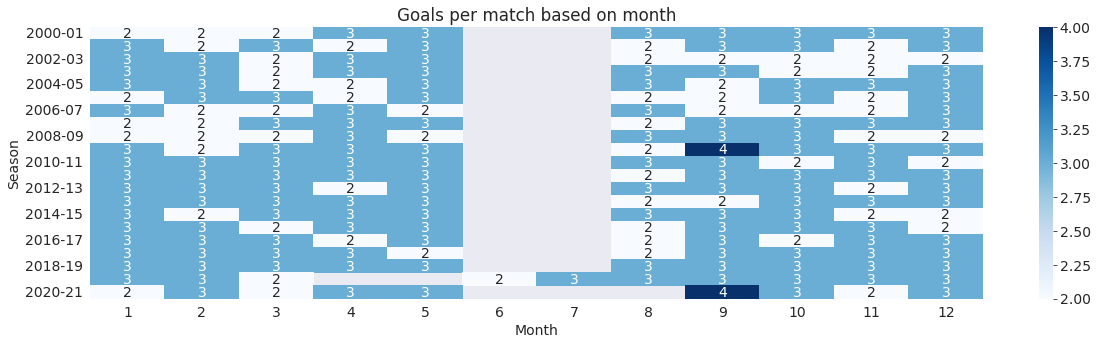

In [ ]:
sns.heatmap(Final, annot = True, cmap = 'Blues',fmt='g')
plt.title('Goals per match based on month') 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

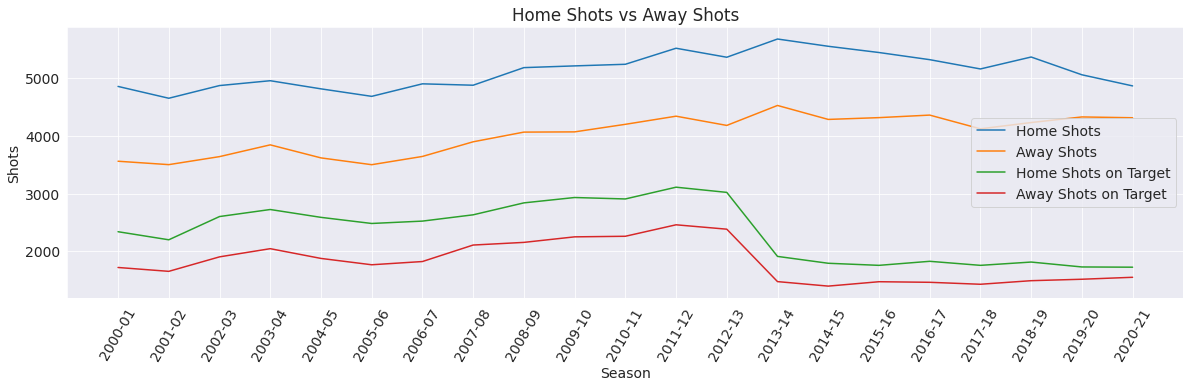

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.lineplot(EPL_by_season.Season, EPL_by_season.HS, data = EPL_by_season)
sns.lineplot(EPL_by_season.Season, EPL_by_season.AS, data = EPL_by_season)
sns.lineplot(EPL_by_season.Season, EPL_by_season.HST, data = EPL_by_season)
sns.lineplot(EPL_by_season.Season, EPL_by_season.AST, data = EPL_by_season)
plt.legend(['Home Shots','Away Shots','Home Shots on Target','Away Shots on Target' ])
plt.ylabel('Shots')
plt.title('Home Shots vs Away Shots') 
plt.xticks(rotation=60)

In [ ]:
EPL_home = EPL_data.groupby(EPL_data.HomeTeam)
EPL_away = EPL_data.groupby(EPL_data.AwayTeam)

In [ ]:
EPL_team_goals = EPL_home['FTHG'].sum() + EPL_away['FTAG'].sum()
EPL_team_goals = EPL_team_goals.reset_index()
EPL_team_goals.rename( columns={0 :'Goals'}, inplace=True )
EPL_team_goals = EPL_team_goals.sort_values(['Goals'], ascending=False)

Text(0, 0.5, 'Team')

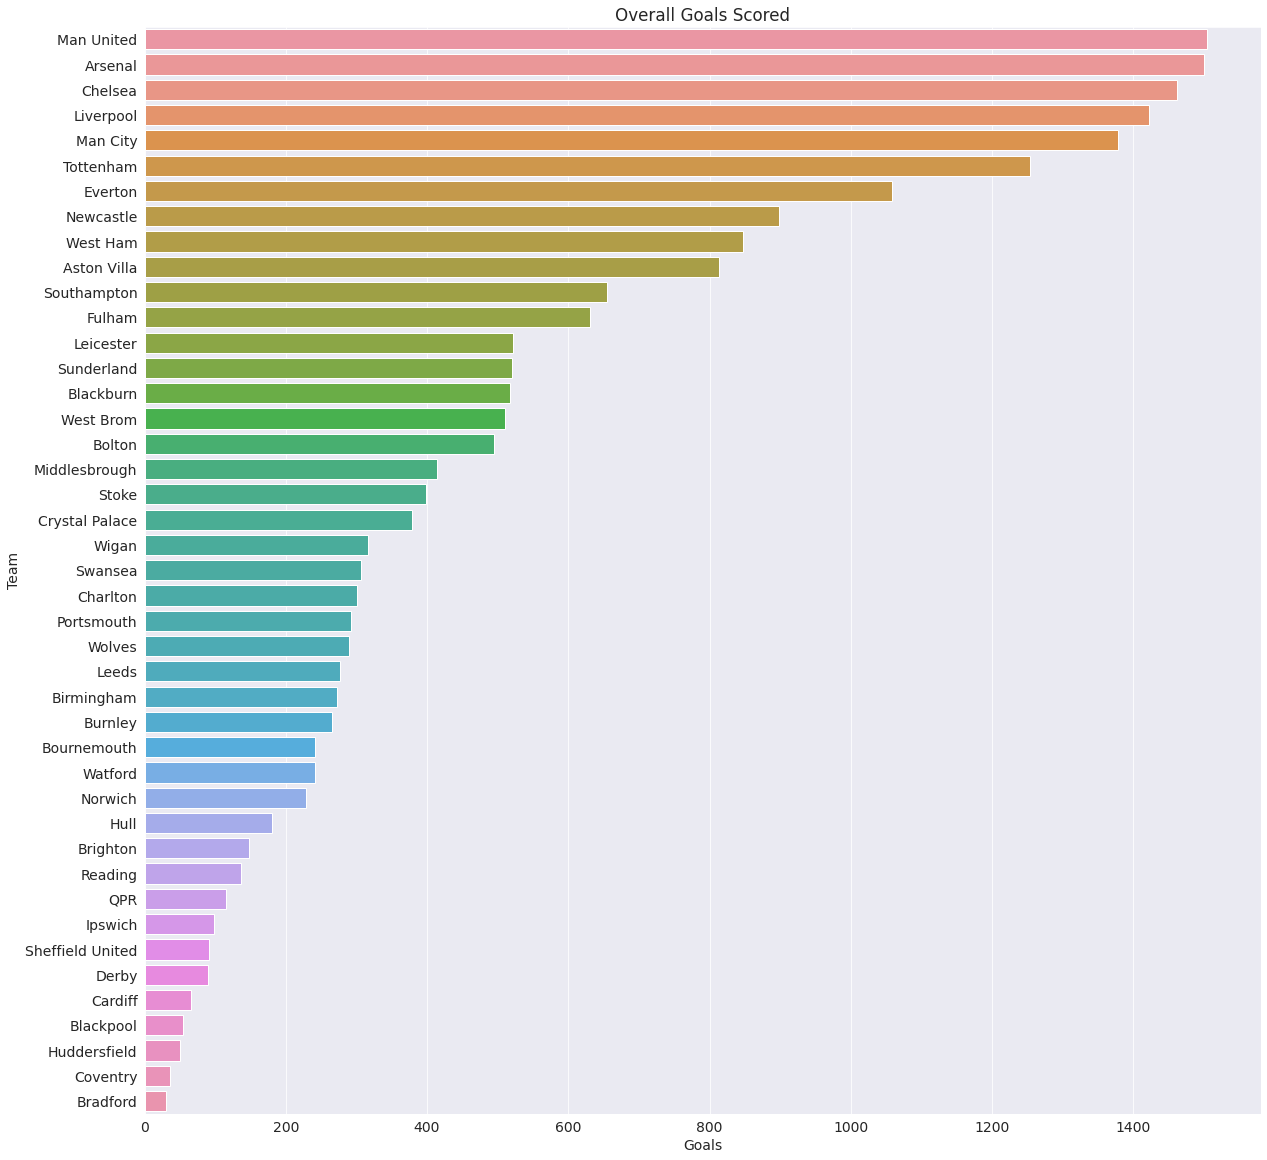

In [ ]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.barplot("Goals",'HomeTeam', data = EPL_team_goals )
plt.title('Overall Goals Scored')
plt.ylabel('Team')

In [ ]:
EPL_team_HomeSCR = EPL_home['FTHG', 'HS'].sum().reset_index() 
EPL_team_AwaySCR = EPL_away['FTAG', 'AS'].sum().reset_index() 
EPL_team_HomeSCR.rename( columns={'HomeTeam' :'Team'}, inplace=True )
EPL_team_AwaySCR.rename( columns={'AwayTeam' :'Team'}, inplace=True )
EPL_team_SCR = pd.concat([EPL_team_HomeSCR, EPL_team_AwaySCR['FTAG'], EPL_team_AwaySCR['AS']], axis = 1)
EPL_team_SCR['SCR'] = (EPL_team_SCR['FTHG'] + EPL_team_SCR['FTAG']) / (EPL_team_SCR['AS'] + EPL_team_SCR['HS']) * 100
EPL_team_SCR

,Team,FTHG,HS,FTAG,AS,SCR
0,Arsenal,857,6203.0,643,4873.0,13.542795
1,Aston Villa,428,4064.0,386,3449.0,10.834553
2,Birmingham,162,1365.0,111,1064.0,11.239193
3,Blackburn,289,2645.0,229,2000.0,11.151776
4,Blackpool,30,253.0,25,193.0,12.331839
5,Bolton,278,2787.0,217,2003.0,10.334029
6,Bournemouth,136,1191.0,105,1021.0,10.895118
7,Bradford,20,221.0,10,150.0,8.086253
8,Brighton,85,948.0,63,748.0,8.726415
9,Burnley,143,1492.0,123,1243.0,9.725777


Text(0, 0.5, 'Team')

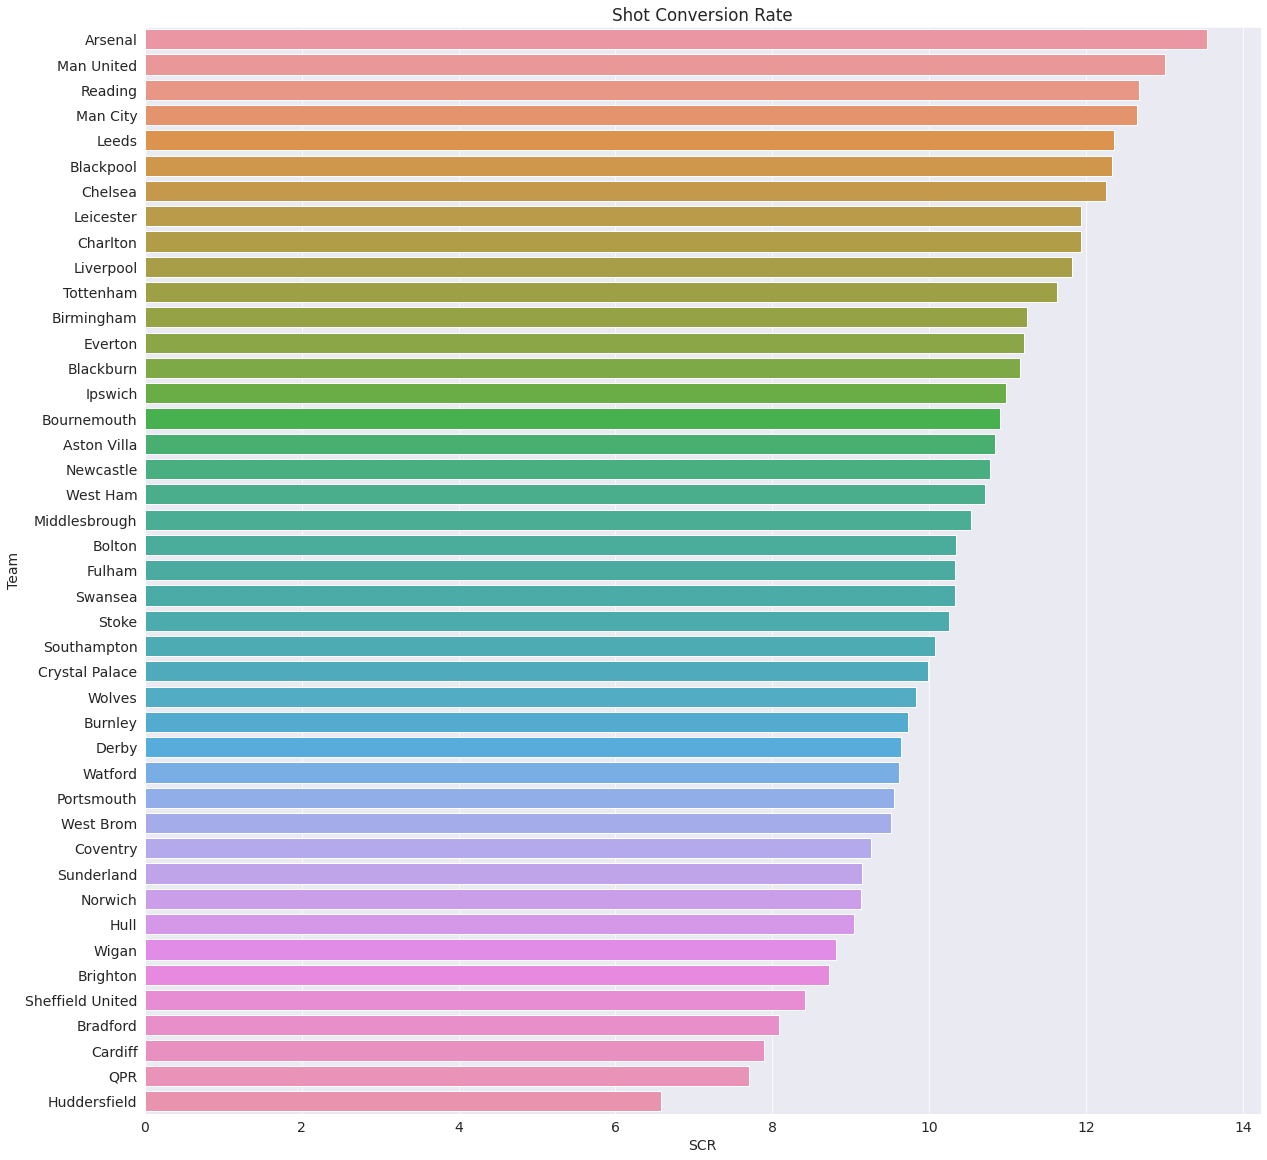

In [ ]:
EPL_team_SCR = EPL_team_SCR.sort_values(['SCR'], ascending=False)
matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.barplot("SCR",'Team', data = EPL_team_SCR )
plt.title('Shot Conversion Rate')
plt.ylabel('Team')

In [ ]:
home_win=100*round((EPL_data.loc[EPL_data['FTR']=='H'].groupby('HomeTeam')['FTR'].count()/EPL_data.groupby('HomeTeam')['FTR'].count()),3)
home_win.sort_values(ascending = False)

HomeTeam
Man United          69.9
Arsenal             67.2
Chelsea             66.4
Liverpool           63.2
Man City            62.4
Tottenham           58.1
Everton             49.6
Newcastle           44.9
Ipswich             44.7
Stoke               42.6
Fulham              42.1
Leicester           42.1
Leeds               42.1
West Ham            41.2
Blackburn           41.1
Portsmouth          40.6
Charlton            40.6
Reading             40.4
Southampton         39.5
Bolton              38.8
Sheffield United    38.6
Swansea             38.3
Birmingham          37.6
Middlesbrough       37.4
Aston Villa         36.8
Wolves              36.1
Bournemouth         35.8
Burnley             35.3
Norwich             33.3
Watford             33.3
Crystal Palace      32.7
Wigan               31.6
West Brom           30.8
Hull                30.5
Sunderland          30.5
Cardiff             28.9
Brighton            28.9
Blackpool           26.3
QPR                 26.3
Derby           

Text(0.5, 1.0, 'Home Ground Win %')

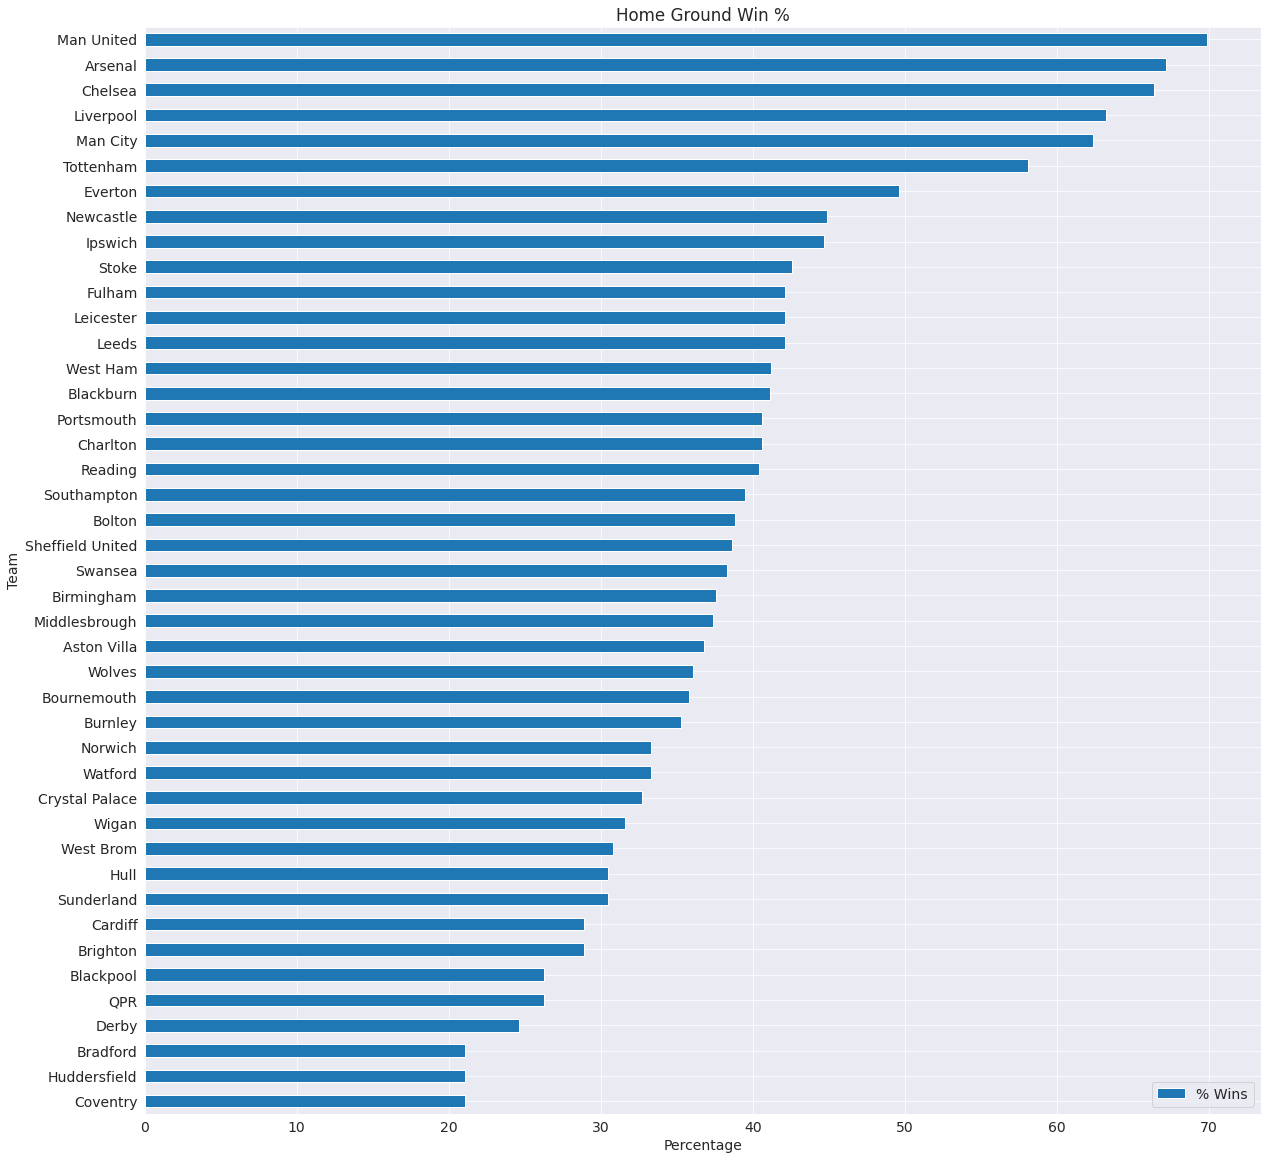

In [ ]:
home_win.sort_values(ascending=True).plot(kind = 'barh')
plt.xlabel('Percentage')
plt.ylabel('Team')
plt.legend(['% Wins'])
plt.title("Home Ground Win %")

Text(0.5, 0, 'Red Cards')

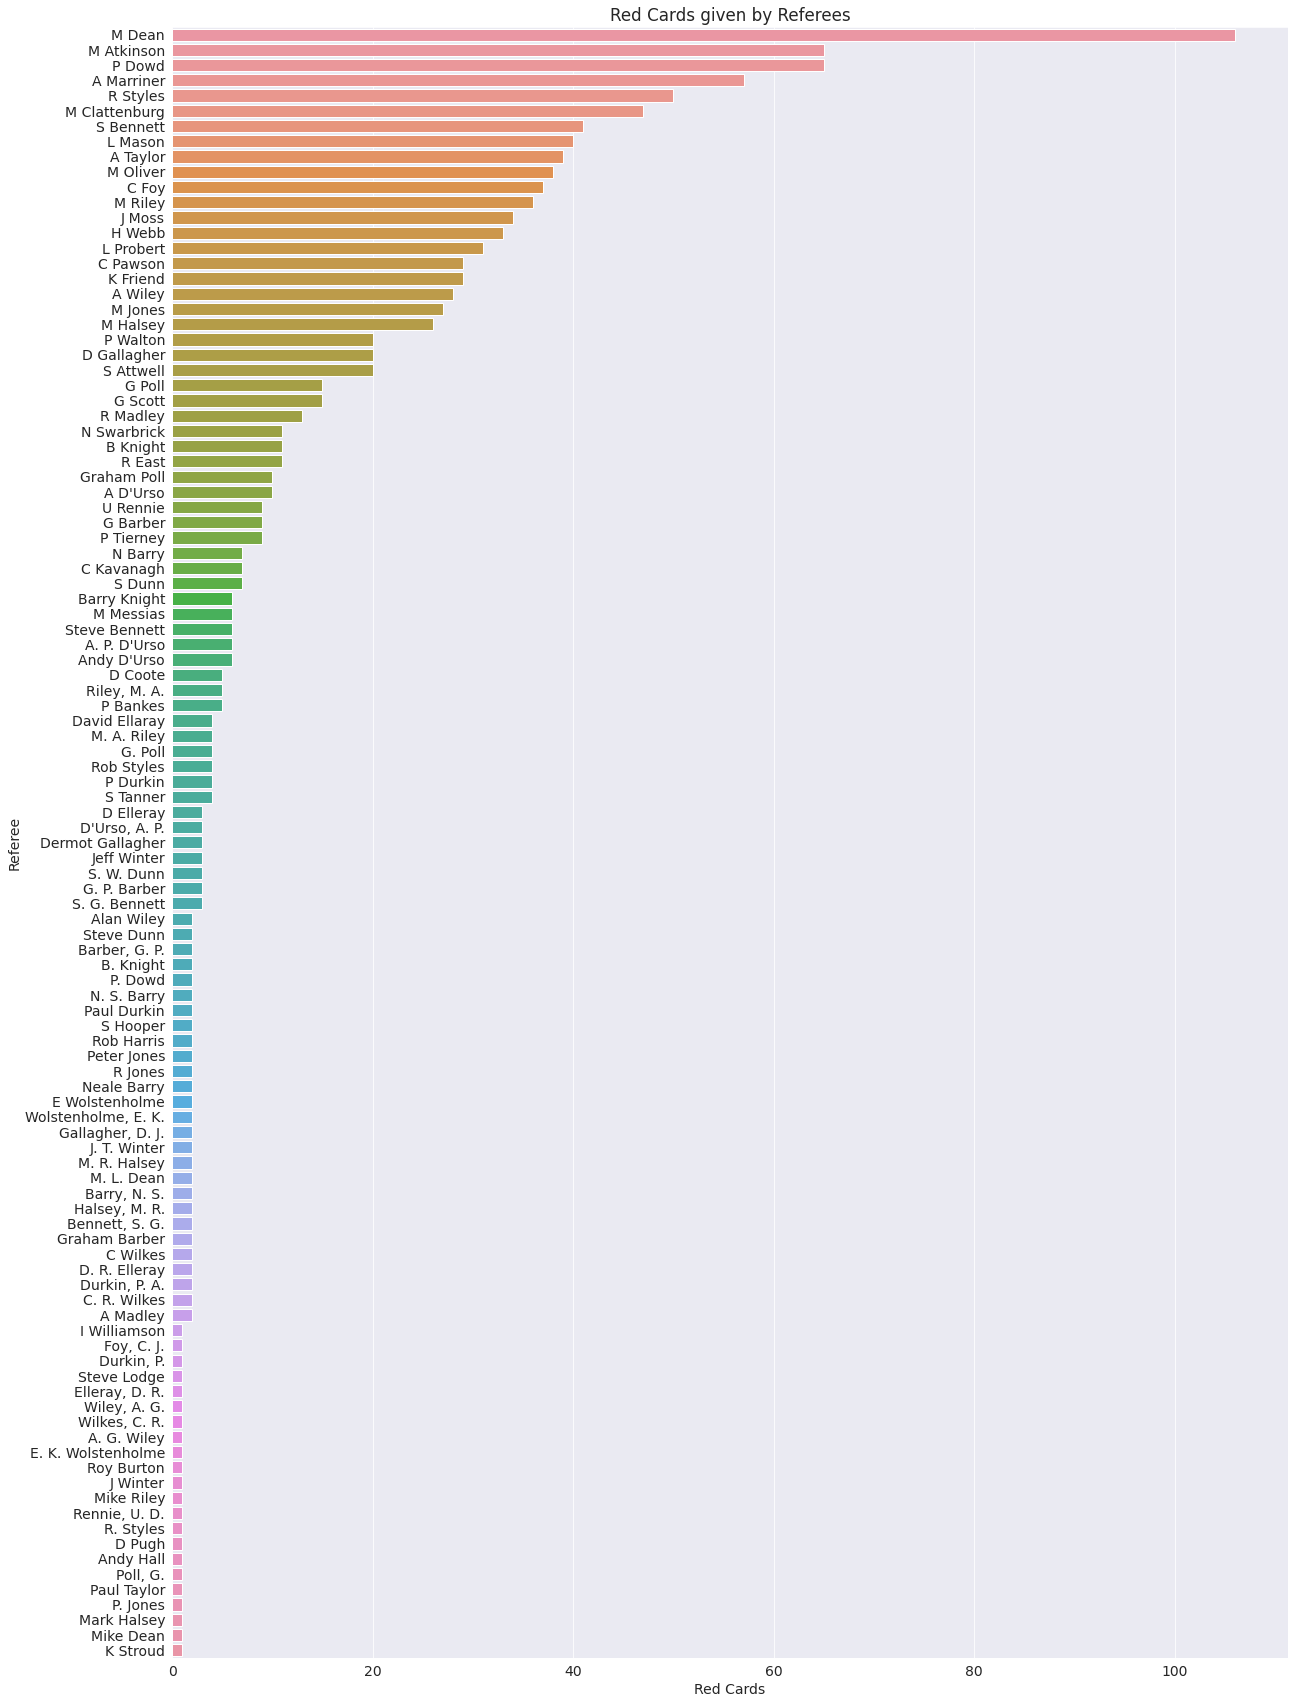

In [ ]:
EPL_ref = EPL_data.groupby(['Referee']).sum().reset_index()
EPL_ref['RC'] = EPL_ref['HR'] + EPL_ref['AR']
EPL_ref = EPL_ref.loc[EPL_ref['RC'] != 0].sort_values(['RC'], ascending=False)
matplotlib.rcParams['figure.figsize'] = (20, 30)
sns.barplot("RC",'Referee', data = EPL_ref )
plt.title('Red Cards given by Referees')
plt.ylabel('Referee')
plt.xlabel('Red Cards')

Text(0, 0.5, 'Comebacks')

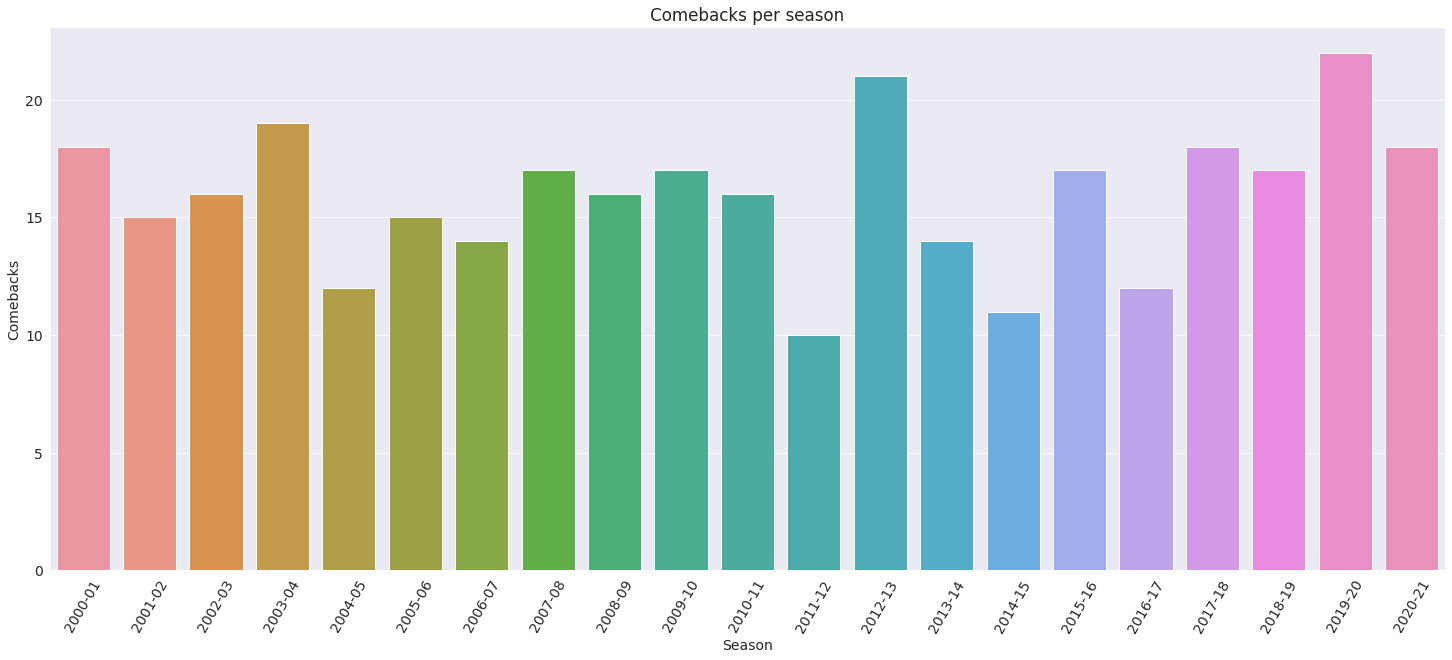

In [ ]:
EPL_data['Comeback']=np.where((EPL_data['FTR']!=EPL_data['HTR'])&(EPL_data['FTR']!='D') & (EPL_data['HTR']!='D'),1,0)
EPL_comeback = EPL_data.groupby('Season').sum().reset_index()
plt.rcParams['figure.figsize'] = 25, 10;
sns.barplot('Season', 'Comeback', data = EPL_comeback)
plt.title('Comebacks per season');
plt.xticks(rotation=60)
plt.ylabel('Comebacks')

In [ ]:
df = EPL_data
df

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR,Month,Day,Comeback
2824,2000-01,Charlton,Man City,4,0,H,2.0,0.0,H,Rob Harris,17.0,8.0,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0,8,19,0
2825,2000-01,Chelsea,West Ham,4,2,H,1.0,0.0,H,Graham Barber,17.0,12.0,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0,8,19,0
2826,2000-01,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,Barry Knight,6.0,16.0,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0,8,19,0
2827,2000-01,Derby,Southampton,2,2,D,1.0,2.0,A,Andy D'Urso,6.0,13.0,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0,8,19,0
2828,2000-01,Leeds,Everton,2,0,H,2.0,0.0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0,8,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10799,2020-21,Liverpool,Crystal Palace,2,0,H,1.0,0.0,H,C Pawson,19.0,5.0,5.0,4.0,14.0,1.0,10.0,8.0,2.0,2.0,0.0,0.0,5,23,0
10800,2020-21,Man City,Everton,5,0,H,2.0,0.0,H,M Oliver,21.0,8.0,11.0,3.0,7.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0,5,23,0
10801,2020-21,Sheffield United,Burnley,1,0,H,1.0,0.0,H,K Friend,12.0,10.0,3.0,3.0,8.0,9.0,11.0,1.0,3.0,1.0,0.0,0.0,5,23,0
10802,2020-21,West Ham,Southampton,3,0,H,2.0,0.0,H,M Atkinson,14.0,17.0,7.0,5.0,2.0,3.0,5.0,9.0,0.0,3.0,0.0,0.0,5,23,0


# Create feature table which will be used to train ML models

In [ ]:
table = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS'))

avg_home_scored = df.FTHG.sum() / 7980.0
avg_away_scored = df.FTAG.sum() / 7980.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_home_conceded)
print(avg_away_conceded)
print(table)

1.149749373433584
1.5205513784461153
Empty DataFrame
Columns: [Team, HGS, AGS, HAS, AAS, HGC, AGC, HDS, ADS]
Index: []


In [ ]:
res_home = EPL_data.groupby('HomeTeam')
res_away = EPL_data.groupby('AwayTeam')

In [ ]:
table.Team = res_home.HomeTeam.all().keys()
table.HGS = res_home.FTHG.sum().values
table.HGC = res_home.FTAG.sum().values
table.AGS = res_away.FTAG.sum().values
table.AGC = res_away.FTHG.sum().values
#19 Home matches for each team each season and 21 seasons therefore 399 home matches and 399 away matches
table.HAS = (table.HGS / 399.0) / avg_home_scored
table.AAS = (table.AGS / 399.0) / avg_away_scored
table.HDS = (table.HGC / 399.0) / avg_home_conceded
table.ADS = (table.AGC / 399.0) / avg_away_conceded

table

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,857,643,1.412560,1.401635,350,478,0.762943,0.787869
1,Aston Villa,428,386,0.705456,0.841417,398,557,0.867575,0.918081
2,Birmingham,162,111,0.267018,0.241962,140,220,0.305177,0.362617
3,Blackburn,289,229,0.476347,0.499183,239,353,0.520981,0.581836
4,Blackpool,30,25,0.049448,0.054496,37,41,0.080654,0.067579
5,Bolton,278,217,0.458217,0.473025,260,353,0.566757,0.581836
6,Bournemouth,136,105,0.224164,0.228883,148,182,0.322616,0.299984
7,Bradford,20,10,0.032965,0.021798,29,41,0.063215,0.067579
8,Brighton,85,63,0.140102,0.137330,102,112,0.222343,0.184605
9,Burnley,143,123,0.235701,0.268120,170,232,0.370572,0.382397


In [ ]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:23]

#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ADS'].values[0])

feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS
2824,Charlton,Man City,H,14.0,4.0,6.0,6.0,0.295039,0.388011,1.290463,0.776331
2825,Chelsea,West Ham,H,10.0,5.0,7.0,7.0,1.376298,0.688828,0.786921,0.927971
2826,Coventry,Middlesbrough,A,3.0,9.0,8.0,4.0,0.023076,0.050136,0.355313,0.446679
2827,Derby,Southampton,D,4.0,6.0,5.0,8.0,0.090654,0.202725,0.608174,0.675787
2828,Leeds,Everton,H,8.0,6.0,6.0,4.0,0.238998,0.261580,0.937330,0.921378
...,...,...,...,...,...,...,...,...,...,...,...
10799,Liverpool,Crystal Palace,H,5.0,4.0,14.0,1.0,1.313664,0.675749,0.418529,0.461513
10800,Man City,Everton,H,11.0,3.0,7.0,5.0,1.297181,0.760763,0.937330,0.921378
10801,Sheffield United,Burnley,H,3.0,3.0,8.0,9.0,0.098896,0.137330,0.268120,0.382397
10802,West Ham,Southampton,H,7.0,5.0,2.0,3.0,0.802703,0.972207,0.608174,0.675787


In [ ]:
feature_table.to_csv("./Feature_table.csv")

In [ ]:
#Function to transform FTR into numeric data type
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [ ]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HAS,HDS,AAS,ADS,Result
2824,Charlton,Man City,H,14.0,4.0,6.0,6.0,0.295039,0.388011,1.290463,0.776331,1
2825,Chelsea,West Ham,H,10.0,5.0,7.0,7.0,1.376298,0.688828,0.786921,0.927971,1
2826,Coventry,Middlesbrough,A,3.0,9.0,8.0,4.0,0.023076,0.050136,0.355313,0.446679,-1
2827,Derby,Southampton,D,4.0,6.0,5.0,8.0,0.090654,0.202725,0.608174,0.675787,0
2828,Leeds,Everton,H,8.0,6.0,6.0,4.0,0.238998,0.261580,0.937330,0.921378,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10799,Liverpool,Crystal Palace,H,5.0,4.0,14.0,1.0,1.313664,0.675749,0.418529,0.461513,1
10800,Man City,Everton,H,11.0,3.0,7.0,5.0,1.297181,0.760763,0.937330,0.921378,1
10801,Sheffield United,Burnley,H,3.0,3.0,8.0,9.0,0.098896,0.137330,0.268120,0.382397,1
10802,West Ham,Southampton,H,7.0,5.0,2.0,3.0,0.802703,0.972207,0.608174,0.675787,1


In [ ]:
#Two sets of training sets - adding features.
X_train = feature_table[['HAS','HDS','AAS','ADS']]
X_train_2 = feature_table[['HAS','HDS','AAS','ADS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HAS,HDS,AAS,ADS
10799,1.313664,0.675749,0.418529,0.461513
10800,1.297181,0.760763,0.937330,0.921378
10801,0.098896,0.137330,0.268120,0.382397
10802,0.802703,0.972207,0.608174,0.675787
10803,0.265370,0.425068,1.445232,0.690621


,HAS,HDS,AAS,ADS,HST,AST,HC,AC
10799,1.313664,0.675749,0.418529,0.461513,5.0,4.0,14.0,1.0
10800,1.297181,0.760763,0.937330,0.921378,11.0,3.0,7.0,5.0
10801,0.098896,0.137330,0.268120,0.382397,3.0,3.0,8.0,9.0
10802,0.802703,0.972207,0.608174,0.675787,7.0,5.0,2.0,3.0
10803,0.265370,0.425068,1.445232,0.690621,4.0,4.0,6.0,2.0


# Train ML models

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [ ]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train, y_train)
    clf1.fit(X_train_2, y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.4682957393483709  :  0.5472431077694236
NB alpha  50   0.46754385964912276  :  0.5478696741854636
NB alpha  100   0.4666666666666667  :  0.5479949874686717
NB alpha  150   0.46578947368421053  :  0.5471177944862156
NB alpha  200   0.4649122807017544  :  0.5477443609022556
NB alpha  250   0.46265664160401004  :  0.5483709273182957
NB alpha  300   0.4619047619047619  :  0.5487468671679199
NB alpha  350   0.46115288220551376  :  0.5479949874686717
NB alpha  400   0.4607769423558897  :  0.5482456140350876
NB alpha  450   0.4606516290726817  :  0.5482456140350879
NB alpha  500   0.4602756892230576  :  0.5486215538847119
NB alpha  550   0.4602756892230576  :  0.549624060150376
NB alpha  600   0.4602756892230576  :  0.549624060150376
NB alpha  650   0.4602756892230576  :  0.5492481203007519
NB alpha  700   0.4602756892230576  :  0.549498746867168
NB alpha  750   0.4602756892230576  :  0.5503759398496241
NB alpha  800   0.4602756892230576  :  0.5498746867167921
NB alpha  850   

In [ ]:
clf = [MultinomialNB(alpha=1), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.4682957393483709  :  0.5473684210526316
SVM  :  0.512781954887218  :  0.5746867167919799
Log regres  :  0.5241854636591479  :  0.5739348370927319


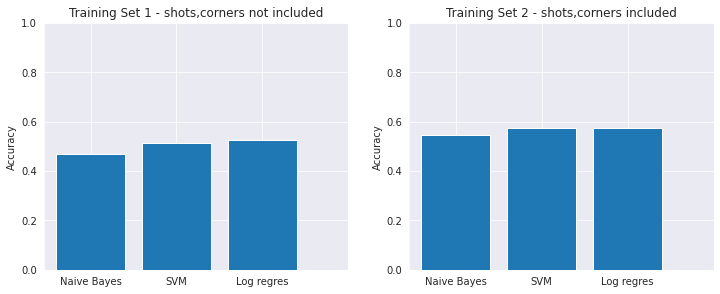

In [ ]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);